In [18]:
# Downloading all the data
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-validation.zip \
    -O /tmp/rps-validation.zip

--2021-03-16 08:46:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.66.176, 142.250.71.80, 216.58.203.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.66.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: '/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  49.2MB/s    in 3.9s    

2021-03-16 08:46:45 (49.2 MB/s) - '/tmp/rps.zip’ saved [200682221/200682221]

--2021-03-16 08:46:46--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.66.176, 142.250.71.80, 216.58.203.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.66.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: '/tmp/

In [19]:
#Extracting the dataset
import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [3]:
#Checking the dataset
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock01-035.png', 'rock02-018.png', 'rock04-093.png', 'rock01-118.png', 'rock01-050.png', 'rock02-042.png', 'rock02-068.png', 'rock07-k03-036.png', 'rock03-020.png', 'rock06ck02-033.png']
['paper04-008.png', 'paper05-020.png', 'paper03-005.png', 'paper02-042.png', 'paper06-109.png', 'paper01-032.png', 'paper04-009.png', 'paper02-085.png', 'paper01-062.png', 'paper06-059.png']
['scissors04-028.png', 'testscissors01-026.png', 'testscissors02-043.png', 'scissors01-015.png', 'testscissors03-112.png', 'scissors01-061.png', 'testscissors03-119.png', 'testscissors01-067.png', 'testscissors03-039.png', 'testscissors03-016.png']


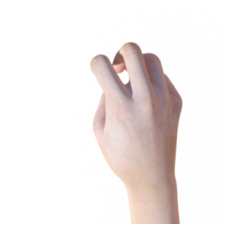

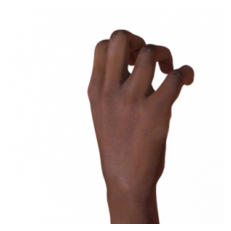

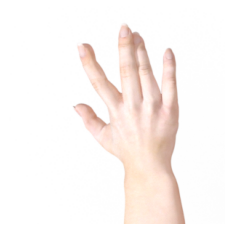

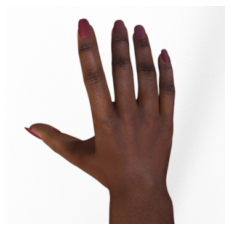

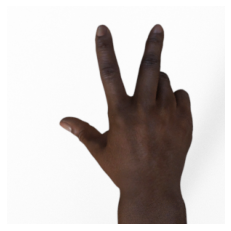

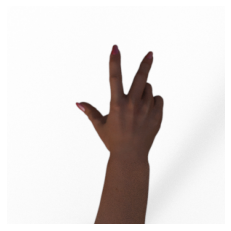

In [5]:
#visualization of the dataset
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [6]:
#Data generators
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/tmp/rps/"
training_datagen = ImageDataGenerator(
                                        rescale = 1./255,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        fill_mode='nearest')

VALIDATION_DIR = "/tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                   target_size=(150,150),
                                                   batch_size = 126,
                                                   class_mode ='categorical')

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                             target_size= (150,150),
                                                             class_mode = 'categorical',
                                                             batch_size =126)


Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [8]:
#Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       7

In [10]:
#Compilation and training
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

history = model.fit(train_generator, epochs = 2, validation_data = validation_generator, 
                    verbose = 1, validation_steps =3)

model.save("rps.h5")

Epoch 1/2
20/20 [==============================] - 42s 2s/step - loss: 1.4008 - accuracy: 0.4461 - val_loss: 0.6755 - val_accuracy: 0.7742
Epoch 2/2
20/20 [==============================] - 27s 1s/step - loss: 0.8602 - accuracy: 0.6120 - val_loss: 0.6965 - val_accuracy: 0.6505


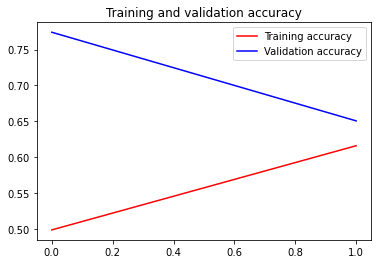

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [27]:
#Testing
import numpy as np
from tensorflow.keras.preprocessing import image
import glob

keys = glob.glob("/tmp/*.png")

for fn in keys:
    # predicting images
    img = image.load_img(fn, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(fn)
    print(classes)

/tmp/paper9.png
[[0. 1. 0.]]
/tmp/scissors2.png
[[0. 0. 1.]]
/tmp/rock7.png
[[0. 1. 0.]]
/tmp/scissors4.png
[[0. 0. 1.]]
/tmp/paper8.png
[[1. 0. 0.]]
/tmp/paper-hires2.png
[[1. 0. 0.]]
/tmp/scissors1.png
[[0. 0. 1.]]
/tmp/scissors3.png
[[0. 0. 1.]]
/tmp/rock5.png
[[0. 1. 0.]]
/tmp/rock4.png
[[0. 1. 0.]]
/tmp/scissors5.png
[[0. 0. 1.]]
/tmp/paper4.png
[[7.291098e-34 0.000000e+00 1.000000e+00]]
/tmp/paper7.png
[[1.0000000e+00 0.0000000e+00 5.1229387e-37]]
/tmp/paper6.png
[[1.0000000e+00 0.0000000e+00 4.3958763e-23]]
/tmp/scissors6.png
[[0. 0. 1.]]
/tmp/paper-hires1.png
[[4.4726725e-37 0.0000000e+00 1.0000000e+00]]
/tmp/scissors8.png
[[0. 0. 1.]]
/tmp/rock3.png
[[0. 1. 0.]]
/tmp/scissors7.png
[[0. 0. 1.]]
/tmp/paper5.png
[[0. 0. 1.]]
/tmp/rock6.png
[[0. 1. 0.]]
/tmp/rock2.png
[[0. 1. 0.]]
/tmp/rock9.png
[[0. 1. 0.]]
/tmp/scissors-hires2.png
[[0. 0. 1.]]
/tmp/scissors9.png
[[0. 0. 1.]]
/tmp/rock-hires1.png
[[0. 1. 0.]]
/tmp/paper3.png
[[0. 0. 1.]]
/tmp/paper2.png
[[1. 0. 0.]]
/tmp/paper1.p